In [1]:
import sklearn
print(sklearn.__version__)

1.6.1


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
#!/bin/bash
!kaggle datasets download arashnic/hr-analytics-job-change-of-data-scientists

Dataset URL: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
License(s): CC0-1.0
  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 499MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/hr-analytics-job-change-of-data-scientists.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import pandas as pd
df = pd.read_csv('/content/aug_train.csv')

df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [11]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [12]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode()[0])
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['major_discipline'] = df['major_discipline'].fillna(df['major_discipline'].mode()[0])
df['company_size'] = df['company_size'].fillna(df['company_size'].mode()[0])
df['company_type'] = df['company_type'].fillna(df['company_type'].mode()[0])
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode()[0])
df['experience'] = df['experience'].fillna(df['experience'].mode()[0])

In [13]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [14]:
df['experience'] = df['experience'].replace('<1', '0')
df['experience'] = df['experience'].replace('>20', '21')

In [15]:
df['experience'] = df['experience'].astype(int)

def map_experience(exp):
    if exp <= 5:
        return 'small_exp'
    elif exp <= 10:
        return 'medium_exp'
    elif exp <= 15:
        return 'high_exp'
    else:
        return 'very_high_exp'

# Apply the function to a new column
df['exp_level'] = df['experience'].apply(map_experience)

In [16]:
df['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [17]:
def map_company_size(size):
    if size == '<10':
        return 'micro'
    elif size in ['10/49', '50-99']:
        return 'small'
    elif size in ['100-500', '500-999']:
        return 'medium'
    elif size in ['1000-4999', '5000-9999']:
        return 'large'
    elif size == '10000+':
        return 'enterprise'
    else:
        return 'unknown'

df['size_label'] = df['company_size'].apply(map_company_size)

In [18]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [19]:
df['last_new_job'].unique()

df['last_new_job'] = df['last_new_job'].replace('never', '0')
df['last_new_job'] = df['last_new_job'].replace('>4', '5')

In [21]:
df['last_new_job']=df['last_new_job'].astype(int)

In [22]:
df['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [20]:
df ['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [23]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [24]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'exp_level', 'size_label'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  exp_level               19158 non-null

In [26]:
y = df['target']
X = df.drop(['enrollee_id','city','target','company_size','experience'], axis=1)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   company_type            19158 non-null  object 
 7   last_new_job            19158 non-null  int64  
 8   training_hours          19158 non-null  int64  
 9   exp_level               19158 non-null  object 
 10  size_label              19158 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.6+ MB


In [29]:
ordinal_cols = [
    'relevent_experience',
    'education_level',
    'exp_level',
    'size_label'
]

one_hot_cols = [
    'gender',
    'enrolled_university',
    'major_discipline',
    'company_type'
]

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

column_transformer = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ('ord', OrdinalEncoder(), ordinal_cols),
    ], remainder='passthrough')

Pipeline1 = Pipeline(steps=[
        ('transformer', column_transformer),
        ('scaler', StandardScaler()),
        ('rfc', RandomForestClassifier())

    ])

Pipeline2 = Pipeline(steps=[
        ('transformer', column_transformer),
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression())

    ])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
gbc_clf=Pipeline1.fit(X_train, y_train)
lr_clf=Pipeline2.fit(X_train, y_train)

In [33]:
gbc_score = gbc_clf.predict_proba(X_test)[:,1]
lr_scores = lr_clf.predict_proba(X_test)[:,1]

gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc_score)
gbc_auc = roc_auc_score(y_test, gbc_score)

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, gbc_score)

trace0 = go.Scatter(
    x=gbc_fpr,
    y=gbc_tpr,
    mode='lines',
    name=f'Gradient Boosting (Area = {gbc_auc:.2f})'
)

trace1 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [34]:
import numpy as np

optimal_idx = np.argmax(gbc_tpr - gbc_fpr)
optimal_threshold = gbc_thresholds[optimal_idx]
print("Optimal threshold gbc is:", optimal_threshold)


optimal_idx = np.argmax(lr_tpr - lr_fpr)
optimal_threshold = lr_thresholds[optimal_idx]
print("Optimal threshold lr is:", optimal_threshold)


Optimal threshold gbc is: 0.2303214285714286
Optimal threshold lr is: 0.24580471908143223


In [ ]:
import pickle
with open('lr.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)

In [35]:
test_data = pd.DataFrame([{
    'city_development_index': 0.83,
    'gender': 'Male',
    'relevent_experience': 'Has relevent experience',
    'enrolled_university': 'Full time course',
    'education_level': 'Graduate',
    'major_discipline': 'STEM',
    'company_type': 'Pvt Ltd',
    'last_new_job': 1,
    'training_hours': 60,
    'exp_level': 'medium_exp',
    'size_label': 'micro'
}])

# answer = preprocessor.transform(test_data)

predicted_class = Pipeline2.predict(test_data)[0]
print(f"Predicted Class: {predicted_class}")

probs = Pipeline2.predict_proba(test_data)
print(f"Probabilities: {probs}")

max_prob = max(probs[0])
print(f"Maximum Probability: {max_prob:.4f}")

Predicted Class: 0.0
Probabilities: [[0.72891596 0.27108404]]
Maximum Probability: 0.7289


Confusion Matrix:
 [[2679  201]
 [ 688  264]]
Accuracy: 0.7680062630480167


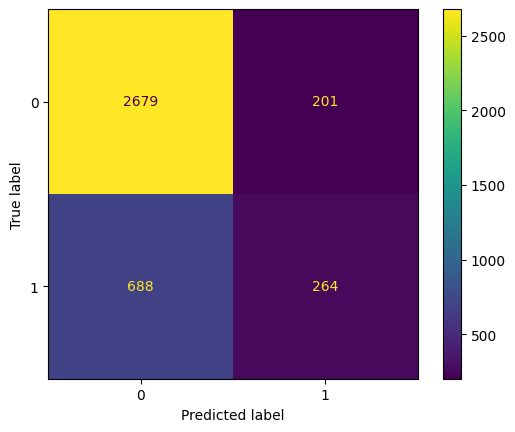

In [36]:
# Step 1: Predict using the default threshold (0.5 internally)
y_pred_default = lr_clf.predict(X_test)

# Step 2: Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_default)

print("Confusion Matrix:\n", cm)

# Step 3: Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

accuracy = accuracy_score(y_test, y_pred_default)
print("Accuracy:", accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()